In [73]:
from itertools import combinations

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [87]:
iris = load_iris(as_frame = True)

df = iris['data']
target_names = pd.Categorical.from_codes(iris.target, iris.target_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Задание 1

<Axes: >

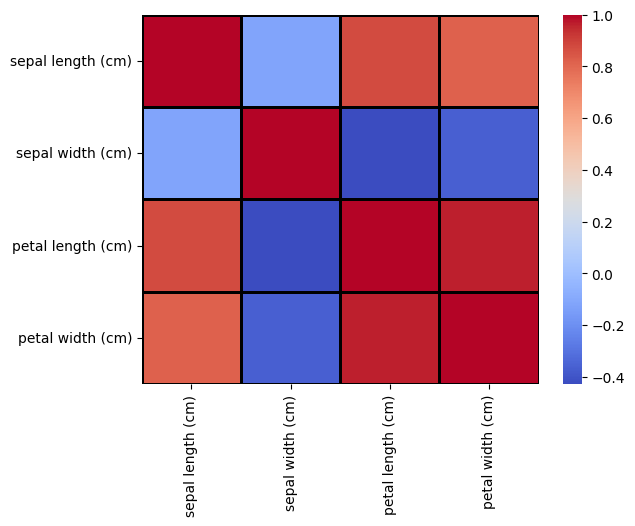

In [88]:
sns.heatmap(df.corr(), cmap = 'coolwarm', linewidths = 2, linecolor = 'black')

<Axes: ylabel='None-None'>

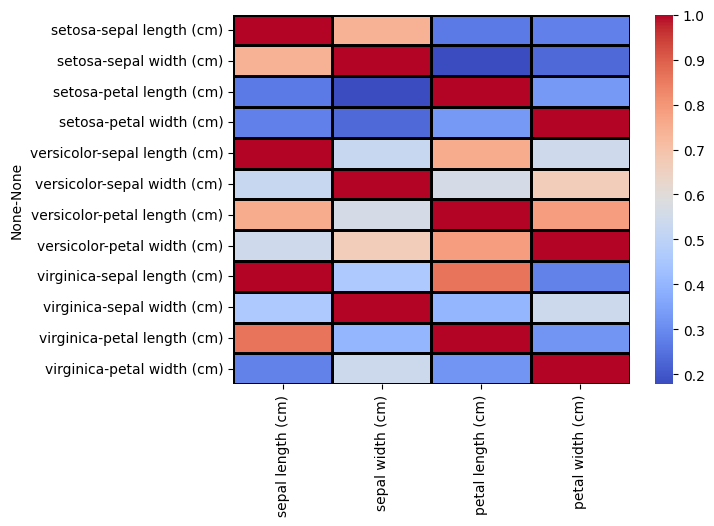

In [90]:
df_groups = df.groupby(target_names, observed = True)
sns.heatmap(df_groups.corr(), cmap = 'coolwarm', linewidths = 2, linecolor = 'black')

In [91]:
def show_distrib(x, y, xlabel, ylabel):
    
    ax = plt.axes()

    for l, c, m in zip(iris.target.unique(), ['r','g','b'], ['s', 'x', 'o']):

        ax.scatter(x[iris.target == l], y[iris.target == l], \
            c = c, marker = m, label = iris.target_names[l], edgecolors = 'black')

    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    return ax

C:\Users\Sanya\AppData\Local\Temp\ipykernel_14120\1171323613.py:7: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x[iris.target == l], y[iris.target == l], \


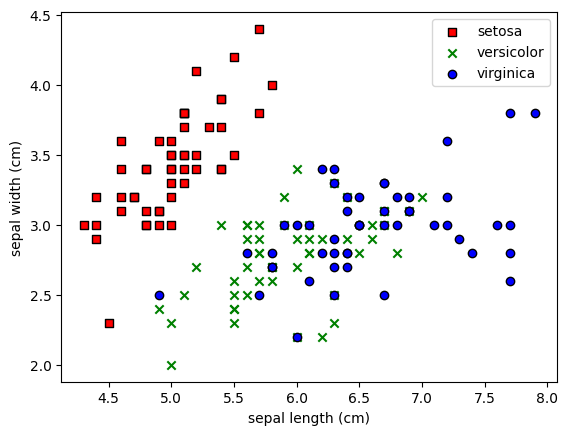

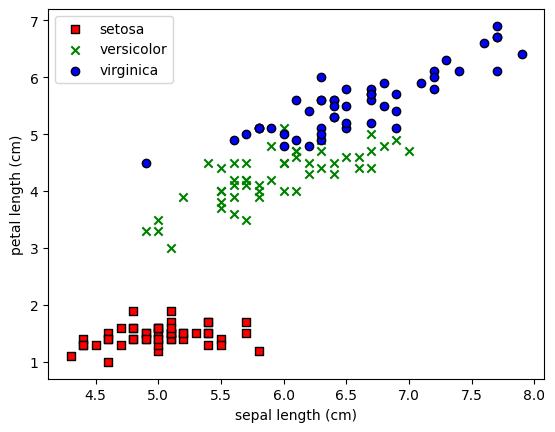

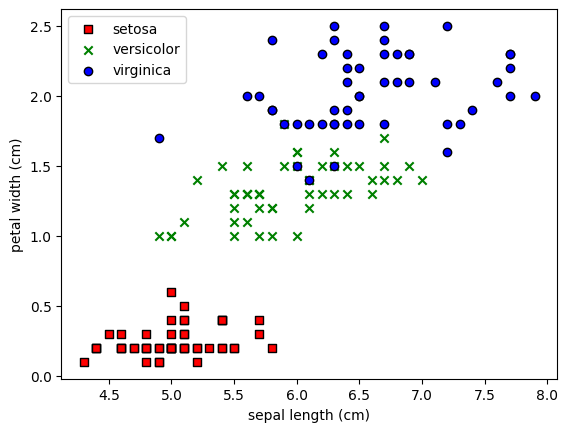

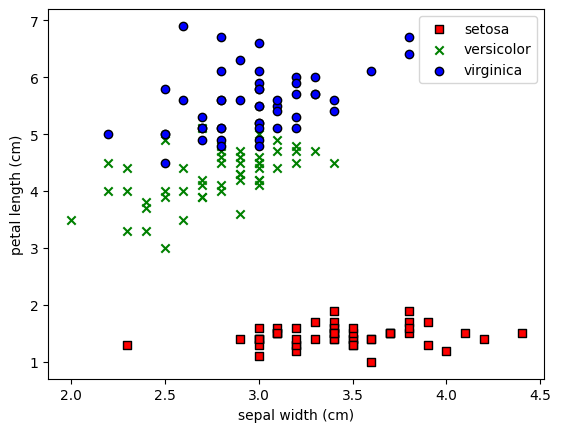

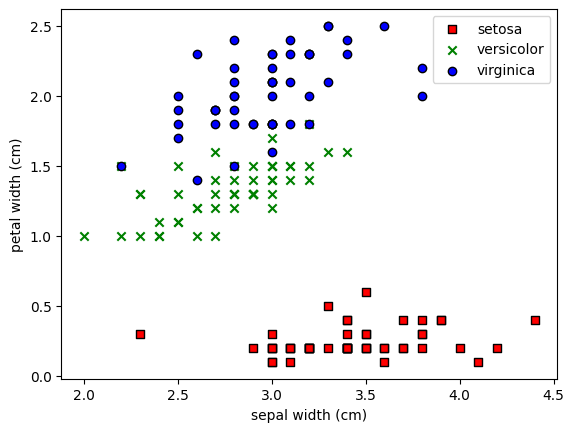

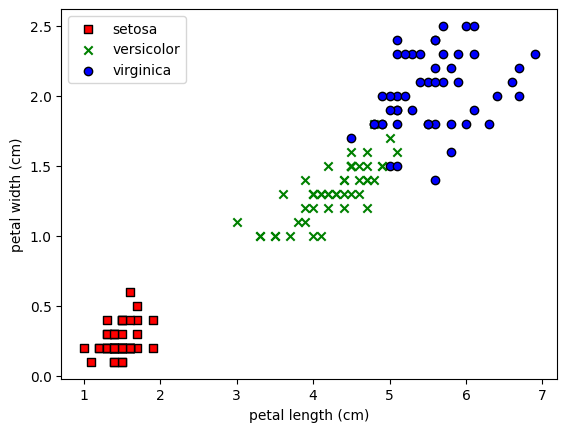

In [92]:
cols = list(df.columns.values) 

for col1, col2 in combinations(cols, 2):       
    show_distrib(df[col1], df[col2], col1, col2)
    plt.show()

## Задание 2

In [107]:
col1 = 'sepal width (cm)'
col2 = 'petal width (cm)'

x = np.array([np.min(df[col1], axis = 0), np.max(df[col1], axis = 0)])

In [116]:
lda = LinearDiscriminantAnalysis()
lda_object = lda.fit(df, iris.target)

C:\Users\Sanya\AppData\Local\Temp\ipykernel_14120\1171323613.py:7: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x[iris.target == l], y[iris.target == l], \


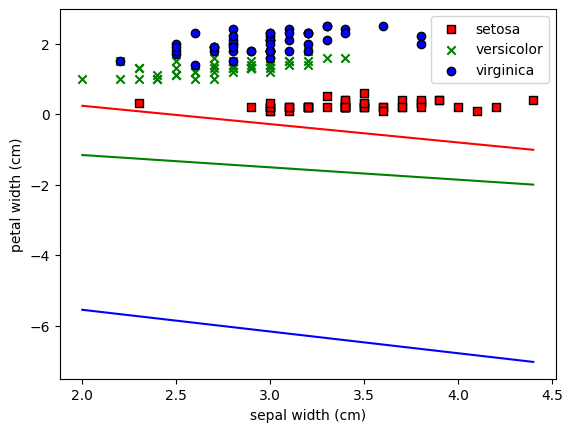

In [117]:
ax = show_distrib(df[col1], df[col2], col1, col2)

for i, c in enumerate(['r','g','b']):
    b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
    y = -(b + x * w1) / w2    
    ax.plot(x, y, c = c)

plt.show()

In [113]:
qda = QuadraticDiscriminantAnalysis()
qda_object = qda.fit(df, iris.target)

In [ ]:
ax = show_distrib(df[col1], df[col2], col1, col2)

for i, c in enumerate(['r','g','b']):
    b, w1, w2 = qda.intercept_[i], qda.coef_[i][0], qda.coef_[i][1]
    y = -(b + x * w1) / w2    
    ax.plot(x, y, c = c)

plt.show()